# MLB Salary Explorer

#### Author: Annika Murray
#### Date: 01/09/2024

In [1]:
import pandas as pd

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('mlb_salaries.csv')

In [3]:
df.head

<bound method NDFrame.head of         playerid    player_name  weight  height bats throws  season league  \
0      aardsda01  David Aardsma     215      75    R      R    2004     NL   
1      aardsda01  David Aardsma     215      75    R      R    2007     AL   
2      aardsda01  David Aardsma     215      75    R      R    2008     AL   
3      aardsda01  David Aardsma     215      75    R      R    2009     AL   
4      aardsda01  David Aardsma     215      75    R      R    2012     AL   
...          ...            ...     ...     ...  ...    ...     ...    ...   
28288  zupcibo01     Bob Zupcic     220      76    R      R    1991     AL   
28289  zupcibo01     Bob Zupcic     220      76    R      R    1992     AL   
28290  zupcibo01     Bob Zupcic     220      76    R      R    1993     AL   
28291  zuvelpa01   Paul Zuvella     173      72    R      R    1989     AL   
28292   zychto01      Tony Zych     190      75    R      R    2016     AL   

      teamid                  tea

The dataset used in this research is borrowed from the kaggle dataset "Baseball Salaries" 
https://www.kaggle.com/datasets/ulrikthygepedersen/baseball-salaries/data

This dataset is comprised of 12 columns and 28,294 samples. Player ID, player name, weight, height, bats, throws, season, league, team ID, team, franchise, and salary are the columns provided. 

In this project, my goal is to explore this dataset to discover some basic statistics about MLB salaries. I would also like to undercover any underlying trends on players salary and their personal demographics. 


## Basic MLB Data Statistics

#### What years the data ranges from:

In [4]:
print("Studying MLB salaries in the years from" , min(df['season']) , "to" , max(df['season']))

Studying MLB salaries in the years from 1985 to 2016


#### Maximum and Minimum Salary:

In [5]:
print("The maximum salary was", min(df['salary']), "and the maximum was", max(df['salary']))

The maximum salary was 10900 and the maximum was 33000000


#### How many players salaries were recorded?


In [6]:
player_count = df['playerid'].nunique()
print("Number of unique occurrences in the column:", player_count)

Number of unique occurrences in the column: 5005


#### There are now 30 MLB teams in 2023. Why do we have 35? 

In [7]:
teams = df['team'].unique()
for t in teams:
    print(t)

San Francisco Giants
Chicago White Sox
Boston Red Sox
Seattle Mariners
New York Yankees
New York Mets
Baltimore Orioles
Cincinnati Reds
Houston Astros
Oakland Athletics
Minnesota Twins
Florida Marlins
California Angels
Milwaukee Brewers
Atlanta Braves
Colorado Rockies
Philadelphia Phillies
Tampa Bay Devil Rays
Kansas City Royals
San Diego Padres
Los Angeles Angels of Anaheim
Los Angeles Dodgers
Arizona Diamondbacks
Toronto Blue Jays
St. Louis Cardinals
Detroit Tigers
Cleveland Indians
Texas Rangers
Chicago Cubs
Montreal Expos
Anaheim Angels
Tampa Bay Rays
Pittsburgh Pirates
Miami Marlins
Washington Nationals


Four MLB teams have undergone name changes since 1985, with one team changing names twice.

California Angels -> Anaheim Angels in 1997 -> Los Angeles Angels of Anaheim in 2005
Tampa Bay Devil Rays -> Tampa Bay Rays in 2008
Florida Marlins -> Miami Marlins in 2012
Montreal Expos -> Washington Nationals in 2005

Lets make this change in our dataset. 

In [8]:
team_name_mapping = {'California Angels' : 'Los Angeles Angels of Anaheim', 
                       'Anaheim Angels'  : 'Los Angeles Angels of Anaheim', 
                       'Tampa Bay Devil Rays' :'Tampa Bay Rays', 
                       'Florida Marlins' : 'Miami Marlins',
                       'Montreal Expos' : 'Washington Nationals' }

# Replace old team names with new team names in the 'team' column
df['team'] = df['team'].replace(team_name_mapping)

teams_count = df['team'].nunique()
print("Number of unique occurrences in the column:", teams_count)


Number of unique occurrences in the column: 30


#### What players are most frequently recorded?

In [9]:
most_occurring_player = df['player_name'].value_counts().idxmax()
print("Most occurring player is", most_occurring_player)


Most occurring player is Alex Gonzalez


## MLB Linear Regression Analysis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
intercepts=[]
coeff=[]

In [11]:
seasons = df['season'].values
salaries = df['salary'].values

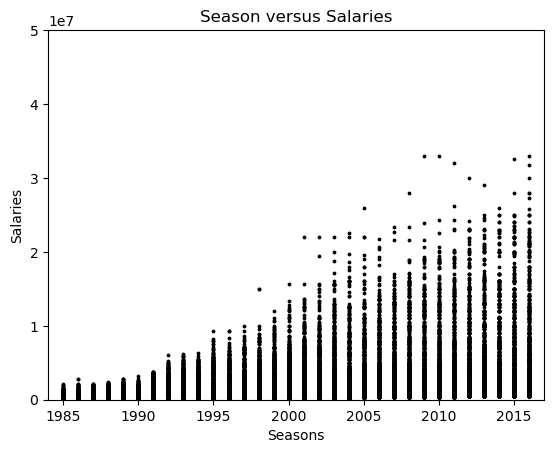

In [12]:
plt.scatter(seasons, salaries, color='black', s=3)
plt.xlabel('Seasons')
plt.ylabel('Salaries')
plt.xlim(1984,2017)
plt.ylim(0,50000000)
plt.title('Season versus Salaries')
plt.show()

We observe from the linear regression that MLB salaries have exponentially increased from 1985 to 2016.

### Linear Regression Preparation

In [13]:
RL_mapping = {'R' : 1,  'L'  : 0, 'B': 0.5 }
df['bats'] = df['bats'].replace(RL_mapping)
df['throws'] = df['throws'].replace(RL_mapping)
df.head


<bound method NDFrame.head of         playerid    player_name  weight  height  bats  throws  season league  \
0      aardsda01  David Aardsma     215      75   1.0       1    2004     NL   
1      aardsda01  David Aardsma     215      75   1.0       1    2007     AL   
2      aardsda01  David Aardsma     215      75   1.0       1    2008     AL   
3      aardsda01  David Aardsma     215      75   1.0       1    2009     AL   
4      aardsda01  David Aardsma     215      75   1.0       1    2012     AL   
...          ...            ...     ...     ...   ...     ...     ...    ...   
28288  zupcibo01     Bob Zupcic     220      76   1.0       1    1991     AL   
28289  zupcibo01     Bob Zupcic     220      76   1.0       1    1992     AL   
28290  zupcibo01     Bob Zupcic     220      76   1.0       1    1993     AL   
28291  zuvelpa01   Paul Zuvella     173      72   1.0       1    1989     AL   
28292   zychto01      Tony Zych     190      75   1.0       1    2016     AL   

      tea

#### Height versus salary

In [14]:
X = df['height']
y = df['salary']
X = np.array(X).reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           9.48e-31
Time:                        16:54:50   Log-Likelihood:            -3.7274e+05
No. Observations:               22634   AIC:                         7.455e+05
Df Residuals:                   22632   BIC:                         7.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.374e+06   7.36e+05     -8.659      0.0

In [16]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
MSE= mean_squared_error(y_test,y_pred)
print("Mean Squared Error:" ,  MSE)

Mean Squared Error: 11673839479025.225


Intercept: -6374379.713189349
Coefficients: x1    115584.901776
dtype: float64


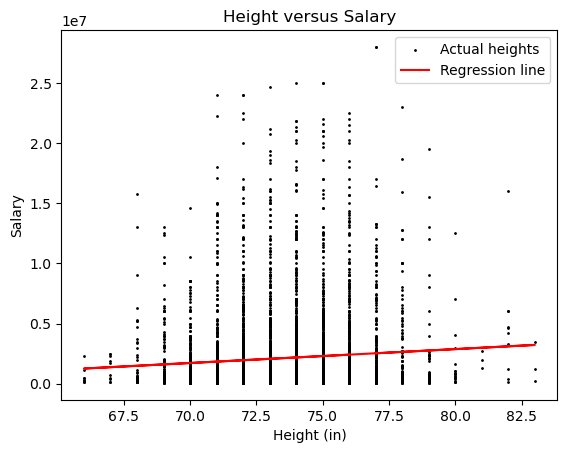

In [17]:
intercept = results.params[0]
coefficients = results.params[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

plt.scatter(X_test[:, 1], y_test, label='Actual heights', color='black',s=1)
plt.plot(X_test[:, 1], y_pred, color='red', label='Regression line')
plt.xlabel('Height (in)')
plt.ylabel('Salary')
plt.title('Height versus Salary')
plt.legend()
plt.show()

#### Weight versus salary

In [18]:
X = df['weight']
y = df['salary']
X = np.array(X).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     959.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.03e-206
Time:                        16:54:50   Log-Likelihood:            -3.7234e+05
No. Observations:               22634   AIC:                         7.447e+05
Df Residuals:                   22632   BIC:                         7.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.986e+06   1.98e+05    -20.091      0.0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     959.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.03e-206
Time:                        16:54:50   Log-Likelihood:            -3.7234e+05
No. Observations:               22634   AIC:                         7.447e+05
Df Residuals:                   22632   BIC:                         7.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.986e+06   1.98e+05    -20.091      0.0

In [20]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
MSE= mean_squared_error(y_test,y_pred)
print("Mean Squared Error:" ,  MSE)

Mean Squared Error: 11303032613909.287


Intercept: -3986100.593120277
Coefficients: x1    30685.148684
dtype: float64


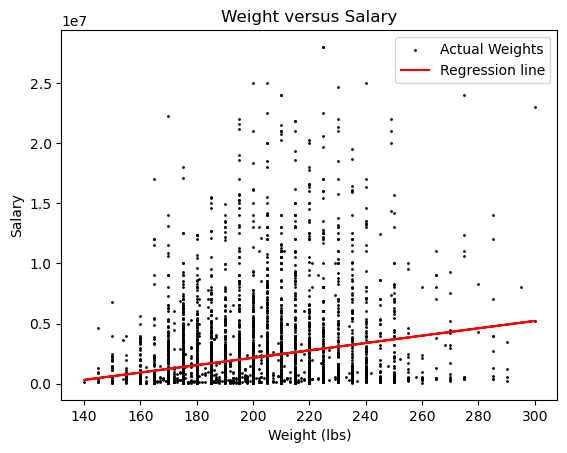

In [21]:
intercept = results.params[0]
coefficients = results.params[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

plt.scatter(X_test[:, 1], y_test, label='Actual Weights', color='black',s=1)
plt.plot(X_test[:, 1], y_pred, color='red', label='Regression line')
plt.xlabel('Weight (lbs)')
plt.ylabel('Salary')
plt.title('Weight versus Salary')
plt.legend()
plt.show()

#### Bats versus salary

In [22]:
df['bats'] = df['bats'].astype(float)
X=df['bats']
X = np.array(X).reshape(-1,1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.005
Date:                Tue, 09 Jan 2024   Prob (F-statistic):            0.00813
Time:                        16:54:51   Log-Likelihood:            -3.7280e+05
No. Observations:               22634   AIC:                         7.456e+05
Df Residuals:                   22632   BIC:                         7.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.212e+06   4.13e+04     53.548      0.0

#### Throws versus salary

In [24]:
df['throws'] = df['throws'].astype(float)
X=df['throws']
X = np.array(X).reshape(-1,1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3175
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.573
Time:                        16:54:51   Log-Likelihood:            -3.7281e+05
No. Observations:               22634   AIC:                         7.456e+05
Df Residuals:                   22632   BIC:                         7.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.146e+06   4.94e+04     43.452      0.0

In [26]:
h = df['height']
w = df['weight']
ratio = h/w
X = np.array(ratio).reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     914.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.71e-197
Time:                        16:54:51   Log-Likelihood:            -3.7236e+05
No. Observations:               22634   AIC:                         7.447e+05
Df Residuals:                   22632   BIC:                         7.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.102e+06   2.32e+05     39.244      0.0

Intercept: 9101927.579353815
Coefficients: x1   -1.870338e+07
dtype: float64


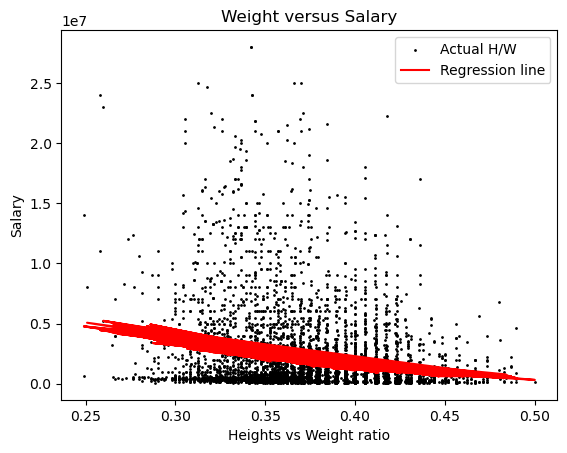

In [28]:
intercept = results.params[0]
coefficients = results.params[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

plt.scatter(X_test, y_test, label='Actual H/W', color='black',s=1)
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Heights vs Weight ratio')
plt.ylabel('Salary')
plt.title('Weight versus Salary')
plt.legend()
plt.show()

#### Conclusions of Ordinary Linear Regression:

In conclusion, the analysis of the dataset reveals insights into the factors influencing salary of MLB players. The variables 'bats' and 'throws' suggests that the handedness of players does not exhibit a significant correlation with their salaries. Similarly, the variables 'weight' and 'height' appear to be weak predictors of salary, and the linear regression models built on these features do not provide substantial evidence that these predictors are significant in anyway. Surprisingly, among these, 'weight' shows a marginally stronger relationship with salary compared to 'height,' still not substantial. Additionally, exploring the ratio of height to weight did not reveal a strong predictive relationship with salary. In summary, the analysis suggests that individual characteristics such as handedness, physical attributes, and personal demographics might not be decisive factors in predicting baseball player salaries, highlighting the need for a better understanding of the determinants of MLB player compensation.